In [1]:
import re
import numpy as np
import pandas as pd
from tqdm import tqdm
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import  Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout,Embedding, Dense, LSTM,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,TensorBoard

In [2]:
import pickle
with open("data1.pickle","rb") as fr:
    전처리_된_데이터 = pickle.load(fr)

In [3]:
train_inputs=전처리_된_데이터['학습_데이터']
train_outputs=전처리_된_데이터['학습_결과']
test_inputs=전처리_된_데이터['태스트_데이터']
test_outputs=전처리_된_데이터['태스트_결과']
val_inputs=전처리_된_데이터['검증_데이터']
val_outputs=전처리_된_데이터['검증_결과']
token=전처리_된_데이터['토큰']
w_n=전처리_된_데이터['단어수']
w_l=전처리_된_데이터['입력길이']

In [4]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5,restore_best_weights=True)
mc = ModelCheckpoint('best_model11.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
t_bd=TensorBoard(log_dir="logs")#앙상블 ,튜플 분류기

In [5]:
model = Sequential()
model.add(Embedding(w_n, 128))
model.add(BatchNormalization())
model.add(LSTM(128,dropout=0.5,return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(256,dropout=0.5,return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(128,dropout=0.5))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_inputs, train_outputs, epochs=15, callbacks=[es, mc,t_bd], batch_size=60,validation_data=(val_inputs,val_outputs))

Epoch 1/15
927/927 [==============================] - 293s 311ms/step - loss: 0.5484 - acc: 0.7136 - val_loss: 0.4774 - val_acc: 0.7755

Epoch 00001: val_acc improved from -inf to 0.77552, saving model to best_model11.h5
Epoch 2/15
927/927 [==============================] - 277s 299ms/step - loss: 0.4285 - acc: 0.8051 - val_loss: 0.4789 - val_acc: 0.7806

Epoch 00002: val_acc improved from 0.77552 to 0.78056, saving model to best_model11.h5
Epoch 3/15
927/927 [==============================] - 274s 295ms/step - loss: 0.3770 - acc: 0.8327 - val_loss: 0.4862 - val_acc: 0.7882

Epoch 00003: val_acc improved from 0.78056 to 0.78820, saving model to best_model11.h5
Epoch 4/15
927/927 [==============================] - 273s 294ms/step - loss: 0.3352 - acc: 0.8546 - val_loss: 0.5112 - val_acc: 0.7803

Epoch 00004: val_acc did not improve from 0.78820
Epoch 5/15
927/927 [==============================] - 279s 300ms/step - loss: 0.3033 - acc: 0.8697 - val_loss: 0.5601 - val_acc: 0.7791

Epoch 0

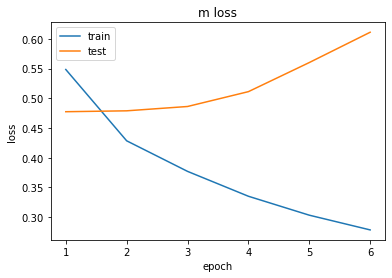

In [7]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('m loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
model.evaluate(test_inputs,test_outputs)[1]

930/930 [==============================] - 62s 67ms/step - loss: 0.4845 - acc: 0.7692


0.7691739201545715

In [9]:
%load_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 2004), started 0:53:11 ago. (Use '!kill 2004' to kill it.)

In [ ]:
#객체는 멤버를 가지고있다,
#임베딩 레이어 는 정보를 가지고있다.
#입력이 들어오면 벡터화 함
loaded_model.layers[0].get_weights()

In [ ]:
len(loaded_model.layers[0].get_weights()[0])
#12614 개의 층, 제일 첫층은 패딩층임

In [ ]:
len(loaded_model.layers[0].get_weights()[0][0])#패딩층

In [ ]:
len(loaded_model.layers[0].get_weights()[0][1])#토큰의 첫글자

In [ ]:
toke.word_index

In [ ]:
d = toke.word_index.items()

In [ ]:
pr_data = sorted (d,key = lambda x :x [1])

In [ ]:
for w,i in pr_data:
    print(i)
    break

In [ ]:
dict_data = toke.word_index